Instalação de dependência exclusiva: ipykernel

In [ ]:
!pip install ipykernel

Preparação e visualização dos dados

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_explore_data():
    # Carregando o dataset Iris do UCI Repository
    iris = fetch_ucirepo(id=53)

    # Exibindo os metadados do dataset
    print("Metadados do dataset:")
    print(iris.metadata)

    # Exibindo informações sobre as variáveis
    print("\nInformações sobre as variáveis:")
    print(iris.variables)

    # Obtendo as features e targets como DataFrames do pandas
    X = iris.data.features
    y = iris.data.targets

    # Visualizando as primeiras linhas das features
    print("\nPrimeiras 5 linhas das features:")
    print(X.head())

    # Visualizando as primeiras linhas dos targets
    print("\nPrimeiras 5 linhas dos targets:")
    print(y.head())

    # Verificando as dimensões das features e targets
    print(f"\nDimensões das features: {X.shape}")
    print(f"Dimensões dos targets: {y.shape}")

    # Verificando os tipos de dados
    print("\nTipos de dados das features:")
    print(X.dtypes)

    print("\nTipos de dados dos targets:")
    print(y.dtypes)

    # Checando valores nulos nas features
    print("\nValores nulos nas features:")
    print(X.isnull().sum())

    # Checando valores nulos nos targets
    print("\nValores nulos nos targets:")
    print(y.isnull().sum())

    # Estatísticas descritivas das features
    print("\nEstatísticas descritivas das features:")
    print(X.describe())

    # Distribuição das classes nos targets
    print("\nDistribuição das classes nos targets:")
    print(y.value_counts())

    # Combinando features e targets em um único DataFrame
    df = pd.concat([X, y], axis=1)

    # Renomeando a coluna target para 'class'
    df = df.rename(columns={df.columns[-1]: 'class'})

    print("\nPrimeiras 5 linhas do DataFrame combinado:")
    print(df.head())

    analyze_outliers(df)

    return df

def analyze_outliers(df):
    features = ['sepal length', 'sepal width', 'petal length', 'petal width']
    outliers_info = {}

    for feature in features:
        # Plotando o boxplot
        #plt.figure(figsize=(8, 4))
        #sns.boxplot(x='class', y=feature, data=df)
        #plt.title(f'Boxplot de {feature} por classe')
        #plt.show()

        # Calculando quartis e IQR para encontrar outliers
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Defininindo os limites para outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificando os outliers
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        
        # Salvando as informações dos outliers
        outliers_info[feature] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outliers': outliers[[feature, 'class']]
        }

        # Exibindo informações sobre outliers
        print(f"\nOutliers detectados para {feature}:")
        print(f"Limite inferior: {lower_bound}, Limite superior: {upper_bound}")
        print(f"Outliers:\n{outliers[[feature, 'class']]}")

    return df, outliers_info



if __name__ == '__main__':
    df = load_and_explore_data()
    df, outliers_info = analyze_outliers(df)


Metadados do dataset:
{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://w

Pré-processamento

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def preprocess_data(df):
    # Separando as features (X) e o target (y)
    X = df.drop('class', axis=1)
    y = df['class']

    # Codificando as classes do target
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Dividindo os dados em treinamento (80%) e teste (20%)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

    # Retornando os conjuntos de treino e teste, e o encoder
    return X_train, X_test, y_train, y_test, label_encoder

if __name__ == '__main__':
    # Este bloco é executado apenas quando o script é executado diretamente
    #from data_preparation import load_and_explore_data

    df = load_and_explore_data()
    X_train, X_test, y_train, y_test, label_encoder = preprocess_data(df)

    # Exibindo as dimensões dos conjuntos
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")


Metadados do dataset:
{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://w

Seleção e Treinamento do Modelo

Metadados do dataset:
{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://w

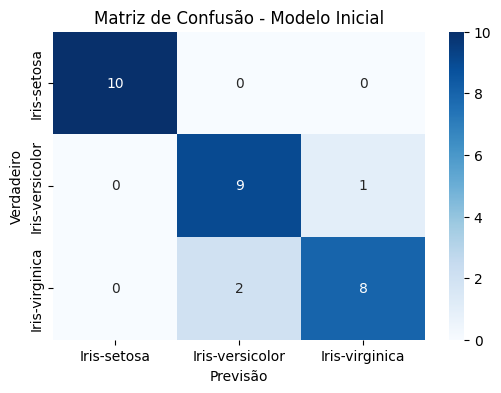


Melhores hiperparâmetros encontrados:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Acurácia do modelo otimizado nos dados de teste: 0.97

Matriz de Confusão - Modelo Otimizado:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Relatório de Classificação - Modelo Otimizado:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



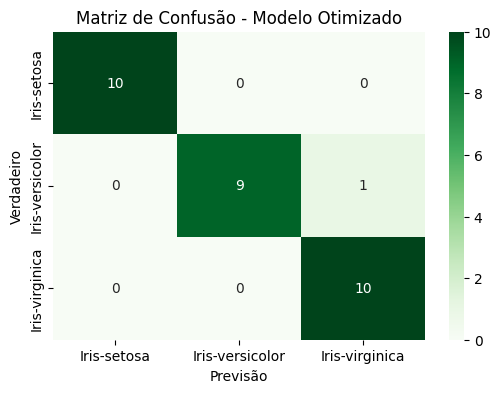


Modelo otimizado treinado e salvo com sucesso.


In [7]:
import os
import joblib
import pandas as pd
#from data_preparation import load_and_explore_data
#from preprocessing import preprocess_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_model():
    # Carregando e preparando os dados
    df = load_and_explore_data()
    X_train, X_test, y_train, y_test, label_encoder = preprocess_data(df)

    # Treinando o modelo inicial com parâmetros padrão
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Avaliação inicial do modelo nos dados de teste
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia do modelo inicial nos dados de teste: {accuracy:.2f}")

    # Matriz de confusão inicial
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nMatriz de Confusão - Modelo Inicial:")
    print(conf_matrix)

    # Relatório de classificação inicial
    class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print("\nRelatório de Classificação - Modelo Inicial:")
    print(class_report)

    # Plotando a matriz de confusão inicial
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Previsão')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão - Modelo Inicial')
    plt.show()

    # Ajuste de hiperparâmetros com validação cruzada 10-fold no conjunto de treinamento
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 2, 4, 6],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    }

    rf_base = RandomForestClassifier(random_state=42)

    # Configurando a validação cruzada estratificada
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=rf_base,
        param_grid=param_grid,
        cv=cv,  # Utilizando validação cruzada 10-fold
        scoring='accuracy',
        n_jobs=1  # Definido como 1 para evitar problemas no Windows
    )

    # Executando o Grid Search no conjunto de treinamento
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("\nMelhores hiperparâmetros encontrados:")
    print(best_params)

    # Treinando o modelo com os melhores hiperparâmetros no conjunto de treinamento completo
    rf_best = RandomForestClassifier(**best_params, random_state=42)
    rf_best.fit(X_train, y_train)

    # Avaliação do modelo otimizado nos dados de teste
    y_pred_best = rf_best.predict(X_test)
    accuracy_best = accuracy_score(y_test, y_pred_best)
    print(f"\nAcurácia do modelo otimizado nos dados de teste: {accuracy_best:.2f}")

    # Matriz de confusão otimizada
    conf_matrix_best = confusion_matrix(y_test, y_pred_best)
    print("\nMatriz de Confusão - Modelo Otimizado:")
    print(conf_matrix_best)

    # Relatório de classificação otimizado
    class_report_best = classification_report(y_test, y_pred_best, target_names=label_encoder.classes_)
    print("\nRelatório de Classificação - Modelo Otimizado:")
    print(class_report_best)

    # Plotando a matriz de confusão otimizada
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Greens',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Previsão')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão - Modelo Otimizado')
    plt.show()

    # Salvando o modelo otimizado e o LabelEncoder
    if not os.path.exists('../models'):
        os.makedirs('../models')

    joblib.dump(rf_best, '../models/random_forest_model.joblib')
    joblib.dump(label_encoder, '../models/label_encoder.joblib')

    print("\nModelo otimizado treinado e salvo com sucesso.")

if __name__ == '__main__':
    train_and_evaluate_model()
